In [1]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from keras import datasets, utils
from PIL import Image
from matplotlib import pyplot as plt

2023-12-05 08:29:04.269510: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 08:29:04.272150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 08:29:04.323449: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 08:29:04.324552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 08:29:04.984192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(X_train, Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

In [3]:
image1 = Image.fromarray(X_train[25],"RGB")
image1.show()

Error: no "view" mailcap rules found for type "image/png"
Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
Can't call method "get_value" on an undefined value at /usr/bin/mimeopen line 159.
Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "/tmp/tmpzxzuhjxz.PNG"
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


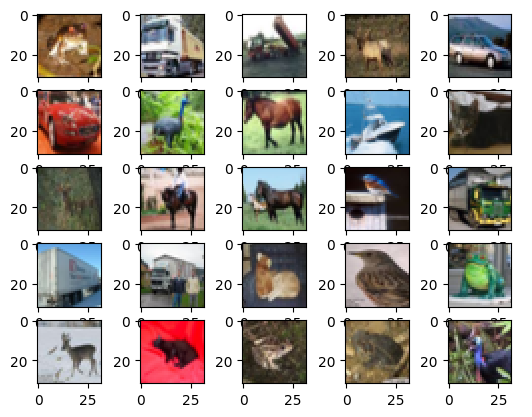

In [4]:
ncols, nrows = 5,5
figs,ax = plt.subplots(nrows,ncols,)
k = 0
for i in range(ncols):
    for j in range(nrows):
        figs.add_subplot(nrows,ncols,k+1)
        ax[i][j].axis(False)
        plt.imshow(Image.fromarray(X_train[k],"RGB"))
        k = k + 1
plt.show()

In [5]:
NUM_CLASSES = 10

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

Y_train = utils.to_categorical(Y_train,NUM_CLASSES)
Y_test = utils.to_categorical(Y_test,NUM_CLASSES)

In [7]:
input_layer = layers.Input((32,32,3))
x = layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                            

In [9]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [10]:
model.fit(X_train,Y_train,batch_size=32,epochs=20,shuffle=10)

Epoch 1/20
1563/1563 [==============================] - 52s 32ms/step - loss: 1.5401 - accuracy: 0.4606
Epoch 2/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1514 - accuracy: 0.5923
Epoch 3/20
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9994 - accuracy: 0.6499
Epoch 4/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9207 - accuracy: 0.6782
Epoch 5/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8521 - accuracy: 0.7030
Epoch 6/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8079 - accuracy: 0.7174
Epoch 7/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7564 - accuracy: 0.7359
Epoch 8/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7211 - accuracy: 0.7485
Epoch 9/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6930 - accuracy: 0.7580
Epoch 10/20
1563/1563 [==============================] - 55s 35m

In [11]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.8485 - accuracy: 0.7296


[0.8485326170921326, 0.7296000123023987]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(Y_test, axis = -1)]

313/313 [==============================] - 8s 23ms/step


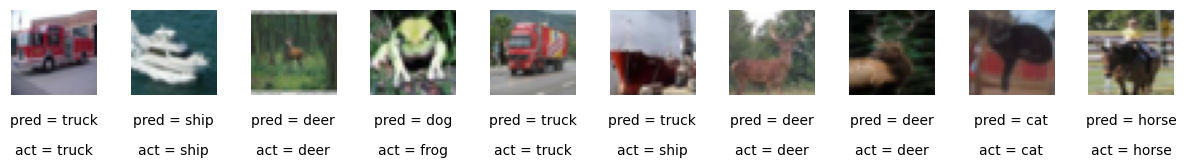

In [13]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)